<font size=5><b> LA Crime Analysis 2010 - 2023
                </b></font>

<font size=2><b> link to dataset:  link to dataset:https://catalog.data.gov/dataset?q=&sort=views_recent+desc</b></font>

In [1]:
import pandas as pd
file_path = '/Users/seanbunk/Desktop/Data_Projects/Python/LA_CrimeAnalysis/Crime_Data_from_2020_to_Present.csv'
data = pd.read_csv(file_path)
# Take a look at the data
data_head = data.head()
data_info = data.info()

(data_head, data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862906 entries, 0 to 862905
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           862906 non-null  int64  
 1   Date Rptd       862906 non-null  object 
 2   DATE OCC        862906 non-null  object 
 3   TIME OCC        862906 non-null  int64  
 4   AREA            862906 non-null  int64  
 5   AREA NAME       862906 non-null  object 
 6   Rpt Dist No     862906 non-null  int64  
 7   Part 1-2        862906 non-null  int64  
 8   Crm Cd          862906 non-null  int64  
 9   Crm Cd Desc     862906 non-null  object 
 10  Mocodes         749241 non-null  object 
 11  Vict Age        862906 non-null  int64  
 12  Vict Sex        757597 non-null  object 
 13  Vict Descent    757584 non-null  object 
 14  Premis Cd       862886 non-null  float64
 15  Premis Desc     862398 non-null  object 
 16  Weapon Used Cd  299647 non-null  float64
 17  Weapon Des

(       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
 0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
 1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
 2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
 3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
 4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   
 
      AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
 0    Southwest          377         2     624   
 1      Central          163         2     624   
 2      Central          155         2     845   
 3  N Hollywood         1543         2     745   
 4      Mission         1998         2     740   
 
                                          Crm Cd Desc  ... Status  \
 0                           BATTERY - SIMPLE ASSAULT  ...     AO   
 1                           BATTERY - SIMPLE ASSAULT  ...     IC   
 2 

In [2]:
# Count the NUll values
null_counts = data.isnull().sum()
null_counts

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           113665
Vict Age               0
Vict Sex          105309
Vict Descent      105322
Premis Cd             20
Premis Desc          508
Weapon Used Cd    563259
Weapon Desc       563259
Status                 1
Status Desc            0
Crm Cd 1              10
Crm Cd 2          804459
Crm Cd 3          861164
Crm Cd 4          862849
LOCATION               0
Cross Street      727445
LAT                    0
LON                    0
dtype: int64

In [3]:
#Check for duplicates
duplicate_rows = data.duplicated().sum()
duplicate_rows

124959

In [4]:
#Drop duplicate values
data_nodup = data.drop_duplicates()

In [5]:
# Convert date columns
data['Date Rptd'] = pd.to_datetime(data["Date Rptd"])
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])

(null_counts, duplicate_rows, data_nodup[["Date Rptd", 'DATE OCC']].dtypes)

(DR_NO                  0
 Date Rptd              0
 DATE OCC               0
 TIME OCC               0
 AREA                   0
 AREA NAME              0
 Rpt Dist No            0
 Part 1-2               0
 Crm Cd                 0
 Crm Cd Desc            0
 Mocodes           113665
 Vict Age               0
 Vict Sex          105309
 Vict Descent      105322
 Premis Cd             20
 Premis Desc          508
 Weapon Used Cd    563259
 Weapon Desc       563259
 Status                 1
 Status Desc            0
 Crm Cd 1              10
 Crm Cd 2          804459
 Crm Cd 3          861164
 Crm Cd 4          862849
 LOCATION               0
 Cross Street      727445
 LAT                    0
 LON                    0
 dtype: int64,
 124959,
 Date Rptd    object
 DATE OCC     object
 dtype: object)

In [6]:
print(data.describe())

              DR_NO       TIME OCC           AREA    Rpt Dist No  \
count  8.629060e+05  862906.000000  862906.000000  862906.000000   
mean   1.961506e+08    1345.993386      10.860006    1132.317284   
std    4.569677e+07     651.250248       6.138097     613.639293   
min    8.170000e+02       1.000000       1.000000     101.000000   
25%    1.620117e+08     900.000000       6.000000     625.000000   
50%    2.201122e+08    1425.000000      11.000000    1162.000000   
75%    2.311107e+08    1900.000000      16.000000    1655.000000   
max    9.102204e+08    2359.000000      21.000000    2198.000000   

            Part 1-2         Crm Cd       Vict Age      Premis Cd  \
count  862906.000000  862906.000000  862906.000000  862886.000000   
mean        1.419721     501.994537      29.941419     309.283723   
std         0.493514     209.151447      21.510678     215.650185   
min         1.000000     110.000000     -12.000000     101.000000   
25%         1.000000     330.000000      1

In [7]:
print(data.describe(include=['O']))

       AREA NAME       Crm Cd Desc Mocodes Vict Sex Vict Descent Premis Desc  \
count     862906            862906  749241   757597       757584      862398   
unique        21               139  231732        5           20         311   
top      Central  VEHICLE - STOLEN    0344        M            H      STREET   
freq       57483             84647   50714   363593       273497      213210   

                                           Weapon Desc  Status  Status Desc  \
count                                           299647  862905       862906   
unique                                              76       7            6   
top     STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)      IC  Invest Cont   
freq                                            164900  703312       703312   

                                      LOCATION Cross Street  
count                                   862906       135461  
unique                                   62632         9034  
top     800 N  AL

<AxesSubplot:>

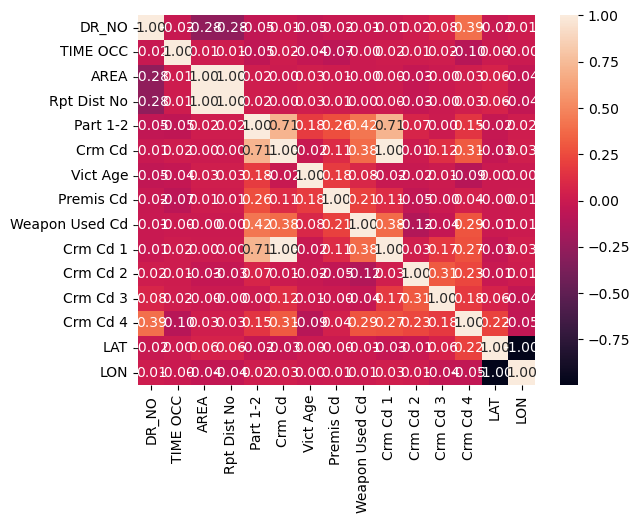

In [8]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True, fmt=".2f")

<font size = 5><b>What are the most common types of crimes?</b></font>

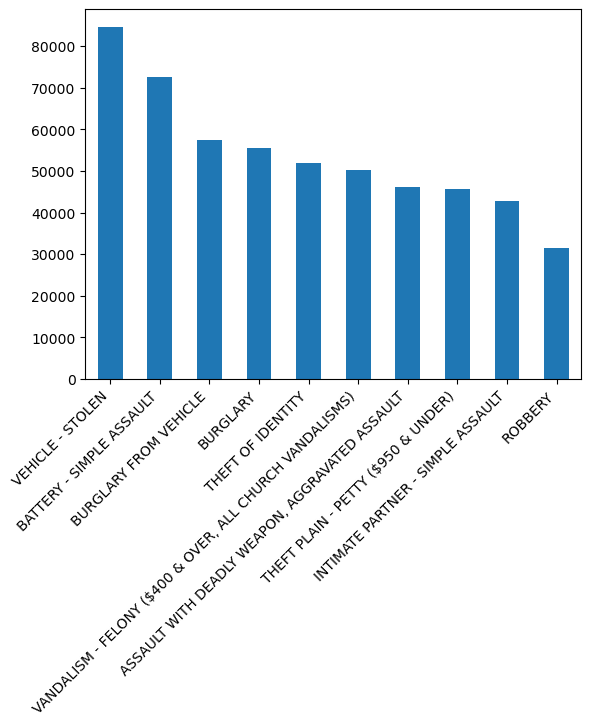

In [9]:
import matplotlib.pyplot as plt

# Count of crimes by type
crime_count = data['Crm Cd Desc'].value_counts().head(10)
crime_count.plot(kind='bar')

# Rotating x-axis labels
plt.xticks(rotation=45, ha='right')

plt.show()

<font size=3><b>Answer:  Stolen Vehicles, Battery, and Burglary from a vehicle are the most common.</b></font>

<AxesSubplot:xlabel='DATE OCC'>

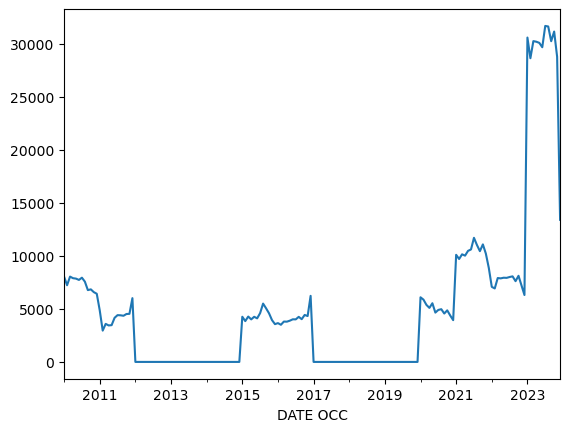

In [10]:
#Time series since 2020 there was a moderate rise until 2023 when crime skyrocketed
data.set_index('DATE OCC').resample('M').size().plot()


In [11]:
#Crime by area
area_crimes = data.groupby('AREA NAME')['DR_NO'].count()
print(area_crimes)

AREA NAME
77th Street    54062
Central        57483
Devonshire     33568
Foothill       28200
Harbor         35176
Hollenbeck     32074
Hollywood      44921
Mission        38528
N Hollywood    44632
Newton         43076
Northeast      38326
Olympic        40589
Pacific        48665
Rampart        40165
Southeast      51678
Southwest      48036
Topanga        38191
Van Nuys       35637
West LA        37039
West Valley    36495
Wilshire       36365
Name: DR_NO, dtype: int64


<AxesSubplot:xlabel='DATE OCC'>

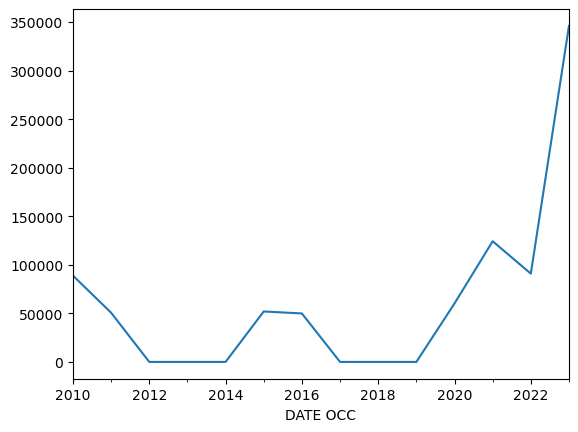

In [12]:
#crimes over the years
data.set_index("DATE OCC").resample('Y').size().plot()

<font size=5><b>How do crime rates vary by time of year, and are there any seasonal trends?</b></font>

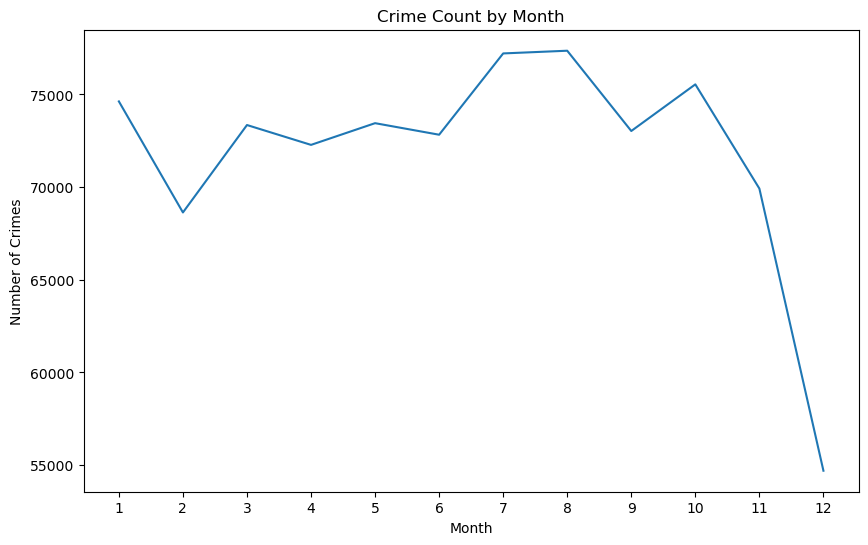

In [13]:
#Extracting the months
data['Month'] = data['DATE OCC'].dt.month

#Count the crimes per month
monthly_crimes = data['Month'].value_counts().sort_index()

#Visualization
plt.figure(figsize=(10,6))
monthly_crimes.plot(kind='line')
plt.title('Crime Count by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(range(1,13)) # 12 months
plt.show()

<font size=3><b>Answer:   Crime starts high in the beginning of the year, goes steady until about June, and then it increase significantly, and tapers back down towards the end of the year.</b></font>

<font size=5><b>Is there a correlation between the time of day and frequency or type of crime?</b></font>

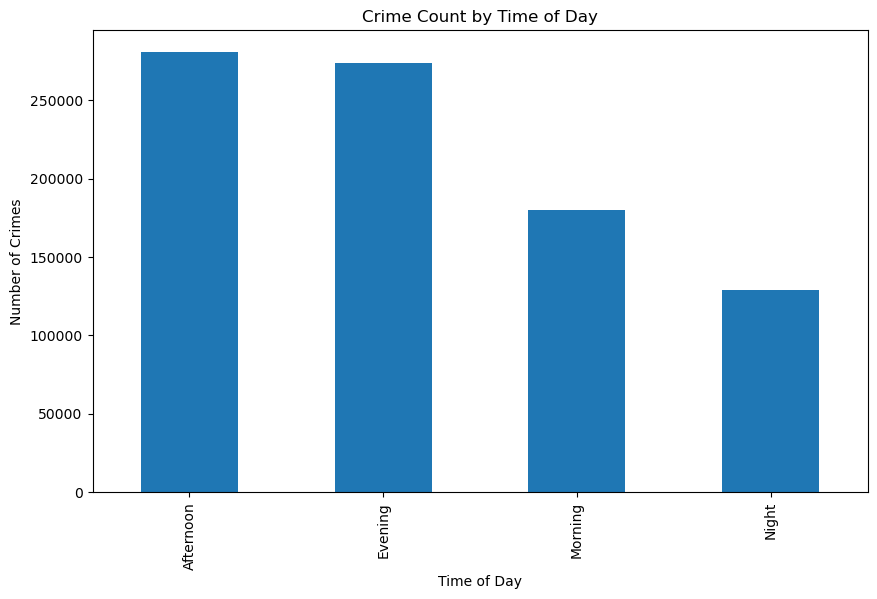

In [14]:
# converting time of occurence into categories
def time_of_day(hour):
    if 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

data['Time Category'] = data['TIME OCC'].apply(lambda x: time_of_day(int(x/100)))

#Count crimes by part of day
time_of_day_crimes = data['Time Category'].value_counts()

# visualization
plt.figure(figsize=(10,6))
time_of_day_crimes.plot(kind='bar')
plt.title('Crime Count by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Crimes')
plt.show()


<font size=3><b>Answer:  Most crimes happen during the afternoon and evening.</b></font>

<font size=5><b>How has the crime rate changed over the years covered in the dataset?</b></font>

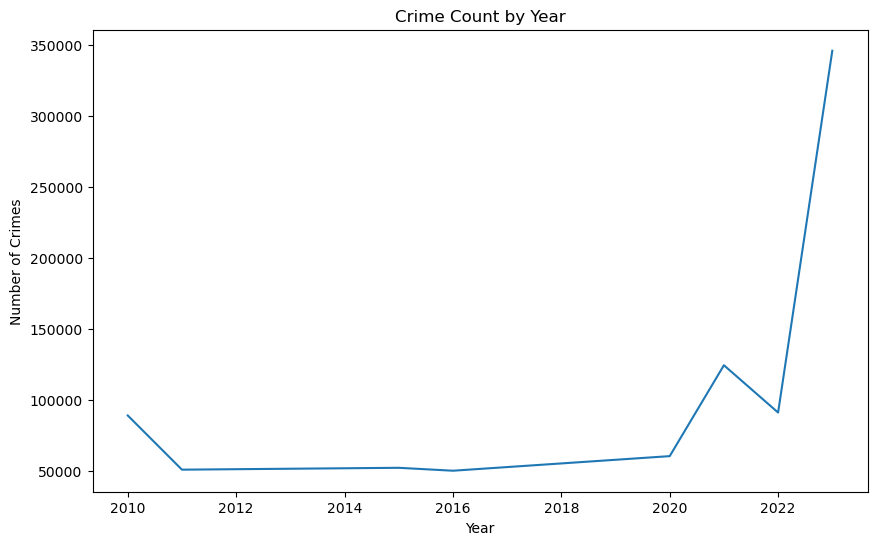

In [15]:
# Count crimes per year
data['Year'] = data['DATE OCC'].dt.year
yearly_crimes = data['Year'].value_counts().sort_index()

# Plot the crimes per year to observe trends
plt.figure(figsize=(10,6))
yearly_crimes.plot(kind='line')
plt.title("Crime Count by Year")
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

<font size=3><b>Answer:  From about 2011 until 2020 the crime rate was about 50000 per year, then spiked in 2021, slightly dropped in 2022, from then on the crime rate has skyrocketed.</b></font>

<font size=5><b>Are certain areas more prone to specific types of crimes?</b></font>

In [16]:
# Crosstabulation
pd.crosstab(data['AREA NAME'], data['Crm Cd Desc'])


Crm Cd Desc,ARSON,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",ATTEMPTED ROBBERY,BATTERY - SIMPLE ASSAULT,BATTERY ON A FIREFIGHTER,BATTERY POLICE (SIMPLE),BATTERY WITH SEXUAL CONTACT,"BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM",BIGAMY,...,UNAUTHORIZED COMPUTER ACCESS,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",VANDALISM - MISDEAMEANOR ($399 OR UNDER),VEHICLE - ATTEMPT STOLEN,VEHICLE - STOLEN,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",VIOLATION OF COURT ORDER,VIOLATION OF RESTRAINING ORDER,VIOLATION OF TEMPORARY RESTRAINING ORDER,WEAPONS POSSESSION/BOMBING
AREA NAME,,,,,,,,,,,,,,,,,,,,,
77th Street,186,68,4928,442,5227,6,227,169,0,1,...,3,2595,1646,314,6879,3,332,649,5,0
Central,199,152,3773,436,6320,41,301,381,2,0,...,12,4019,1397,115,3731,115,131,257,9,2
Devonshire,38,21,998,78,2302,10,53,144,0,0,...,34,1710,857,83,2133,53,274,257,58,1
Foothill,85,48,1462,85,2194,10,59,171,3,0,...,5,1648,837,85,3117,11,224,400,65,2
Harbor,87,23,2103,156,2823,9,74,112,0,0,...,13,2283,1185,238,4872,27,354,1098,17,3
Hollenbeck,95,60,2209,156,2899,11,80,123,0,0,...,5,2099,1114,199,5028,3,372,693,45,1
Hollywood,129,56,2535,271,4119,19,189,260,1,0,...,33,3040,1020,62,3215,53,194,398,21,5
Mission,87,47,1802,185,3262,5,75,209,0,0,...,6,2266,1215,126,4345,4,521,576,36,2
N Hollywood,88,30,1587,148,3194,4,55,189,0,0,...,31,2861,1359,188,3488,54,181,139,54,3


In [17]:
# Group "AREA NAME" and count crimes
area_crime_counts = data.groupby('AREA NAME').size()

#sort the counts in desc
sorted_area_crime_counts= area_crime_counts.sort_values(ascending=False)

print('Area with the most crimes:', sorted_area_crime_counts.idxmax(), 'with', sorted_area_crime_counts.max(), "crimes.")



Area with the most crimes: Central with 57483 crimes.


<font size=3><b> Answer:  The area with the most crimes:  Central LA with 57483 crimes.</b></font>


<font size=5><b>Crimes per Year, per Area:</b></font>

In [18]:
data['Year'] = data['DATE OCC'].dt.year

# Group by 'AREA NAME' and "Year", then count crimes
area_year_crime_counts = data.groupby(['AREA NAME', "Year"]).size().unstack()

print(area_year_crime_counts)

Year            2010     2011     2015     2016     2020     2021     2022  \
AREA NAME                                                                    
77th Street  13868.0    547.0      3.0    474.0      4.0  12659.0      3.0   
Central          2.0    261.0      1.0    284.0  11228.0  12772.0  17296.0   
Devonshire       NaN   5351.0   9552.0    477.0      1.0      NaN      NaN   
Foothill      6569.0    515.0   7328.0    401.0      NaN      1.0      NaN   
Harbor           NaN    354.0      1.0    311.0   8567.0   8637.0   8914.0   
Hollenbeck       NaN    268.0      NaN    318.0   7576.0   7825.0   8316.0   
Hollywood        NaN    372.0      NaN    382.0   9758.0  11739.0  12216.0   
Mission          2.0  10549.0      1.0  11076.0      1.0      2.0      NaN   
N Hollywood  10868.0    512.0  11244.0    529.0      2.0      NaN      NaN   
Newton        9659.0    309.0   3907.0    294.0      NaN   6125.0      1.0   
Northeast    10163.0    424.0      NaN    393.0      NaN   9009.

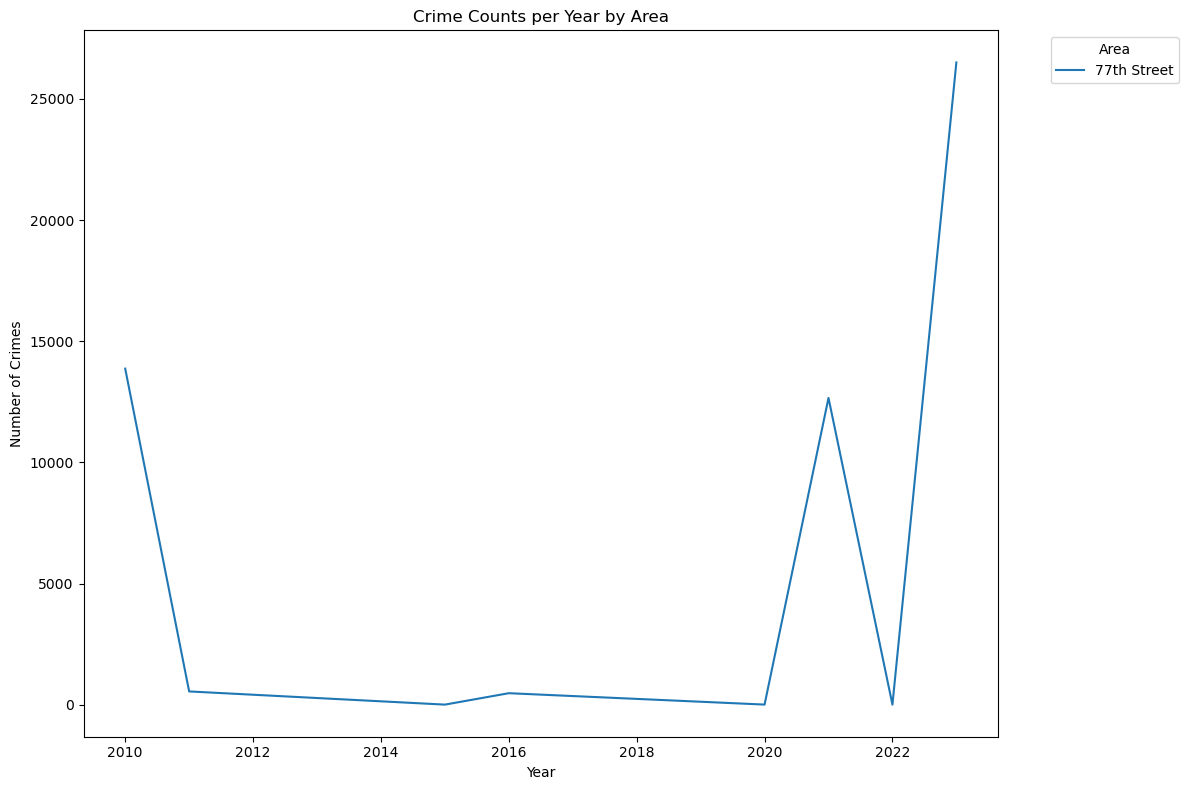

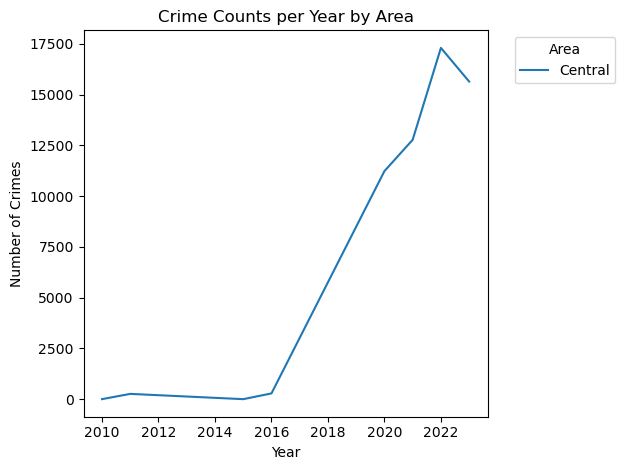

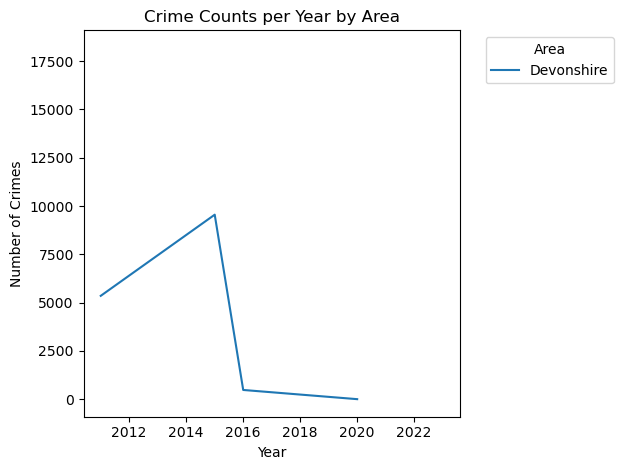

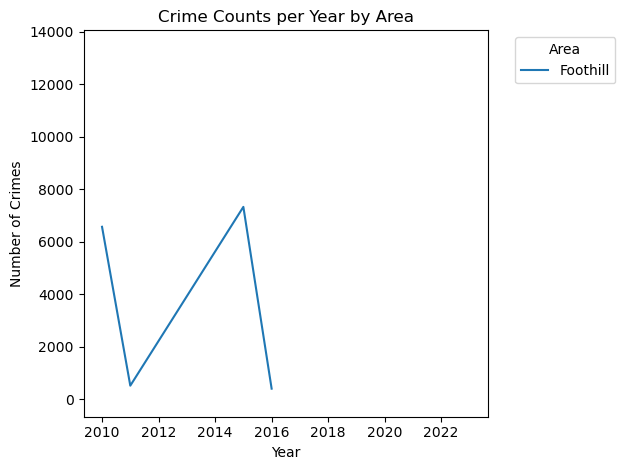

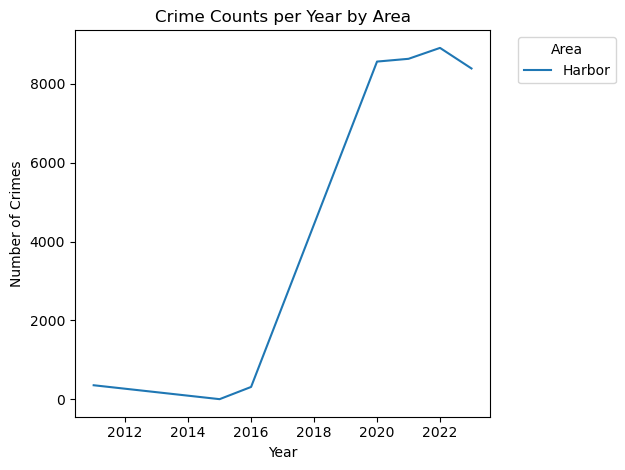

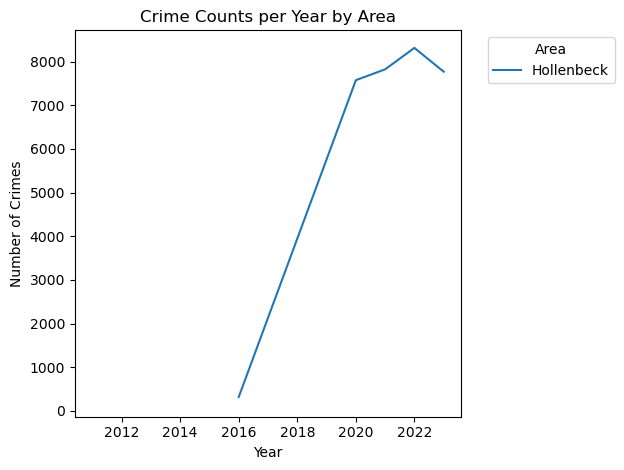

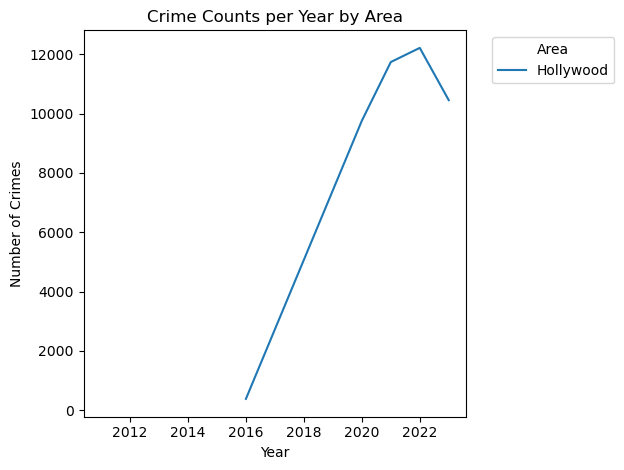

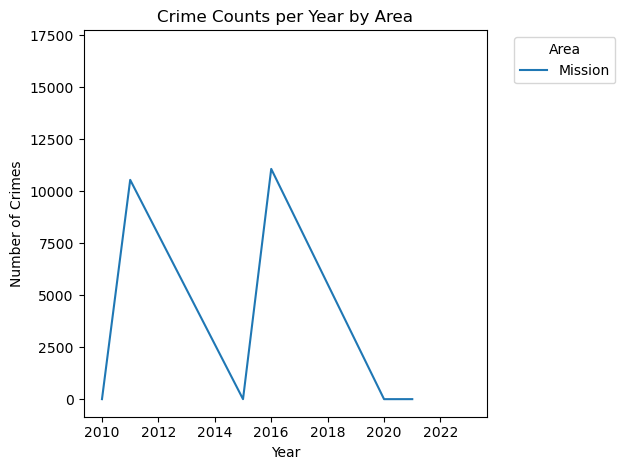

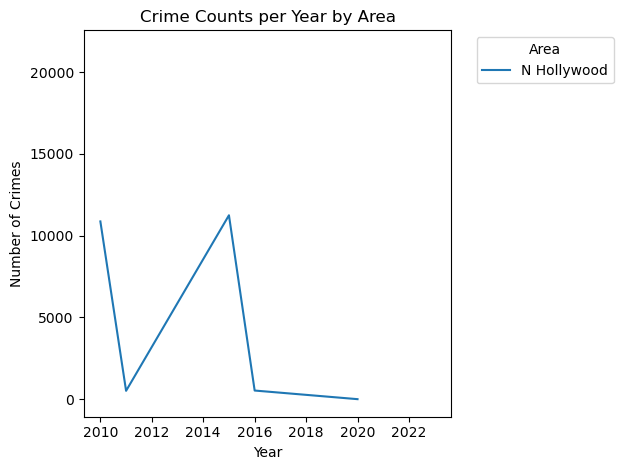

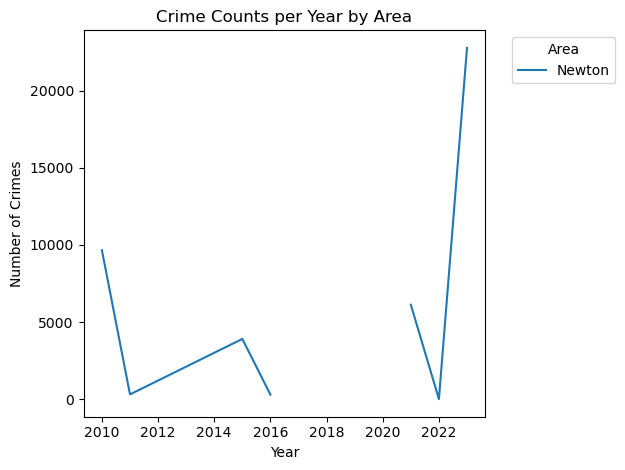

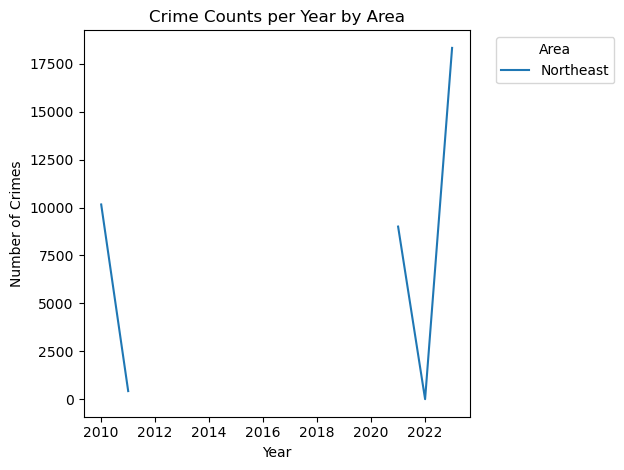

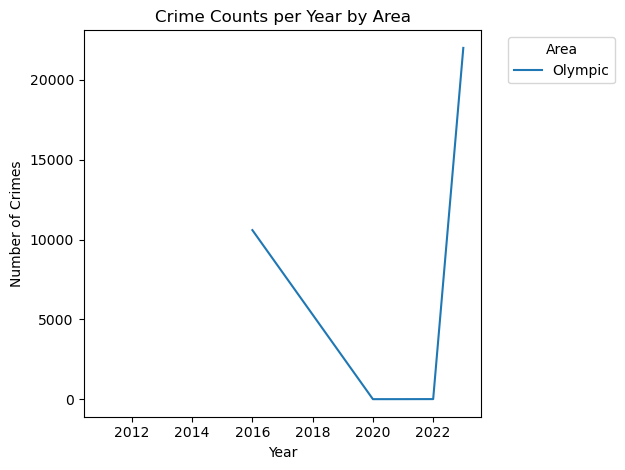

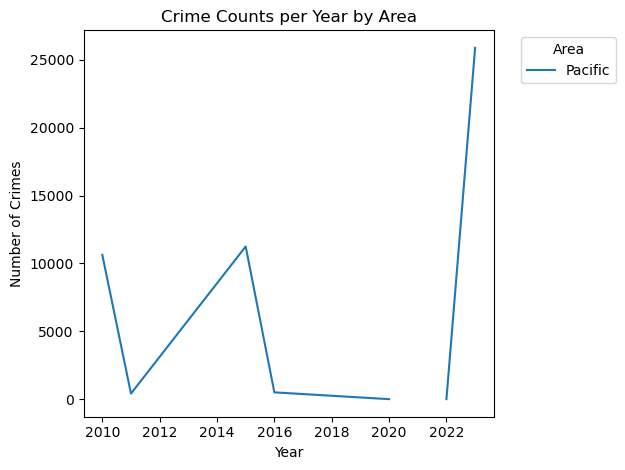

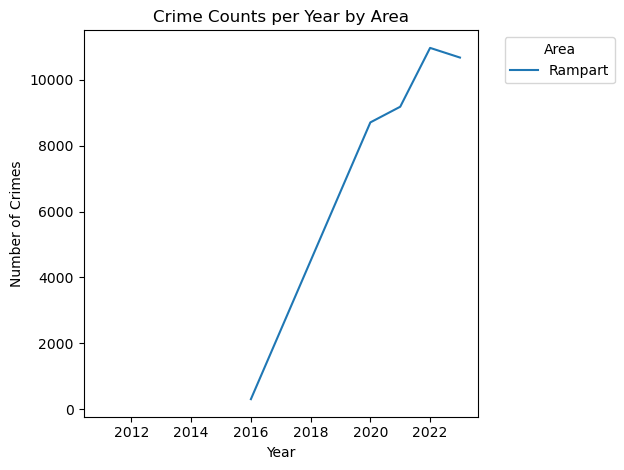

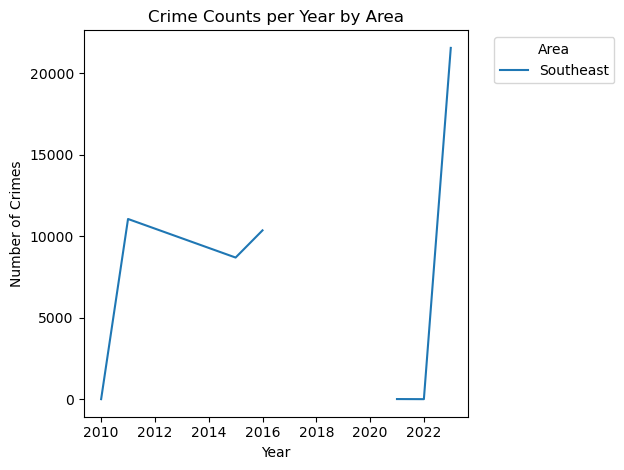

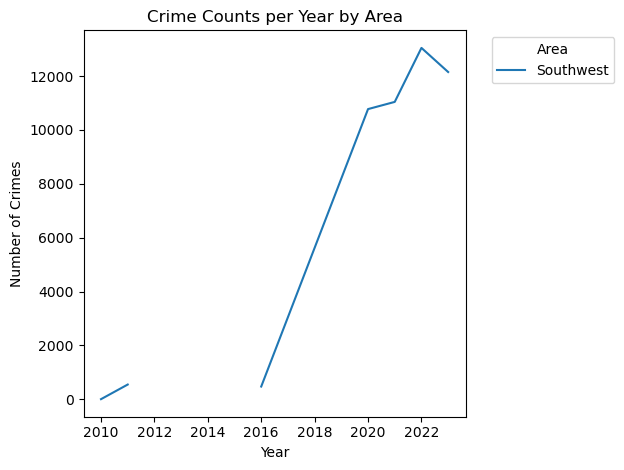

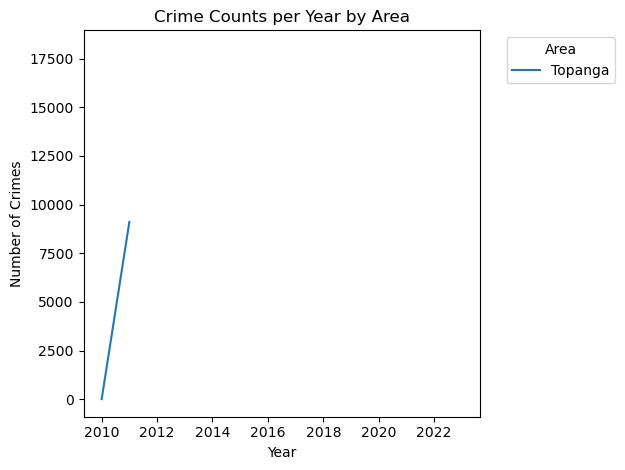

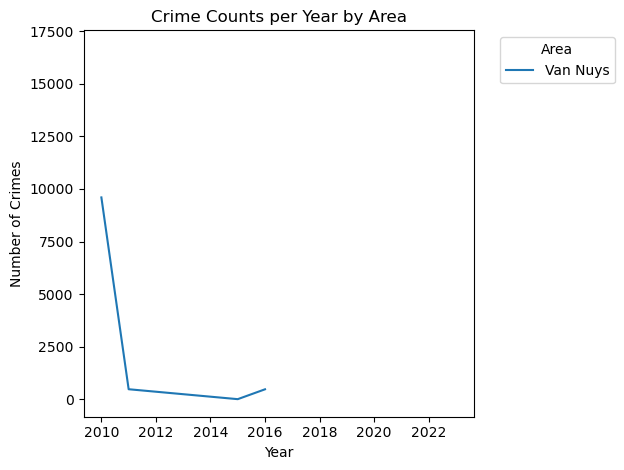

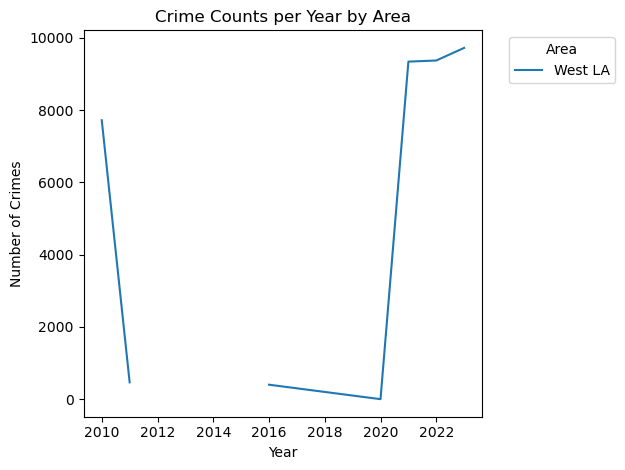

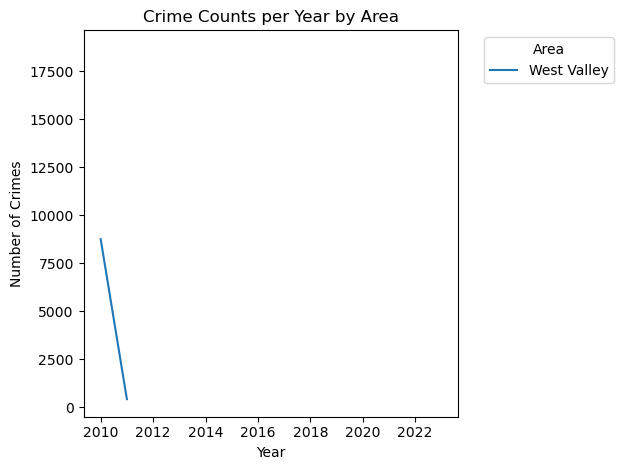

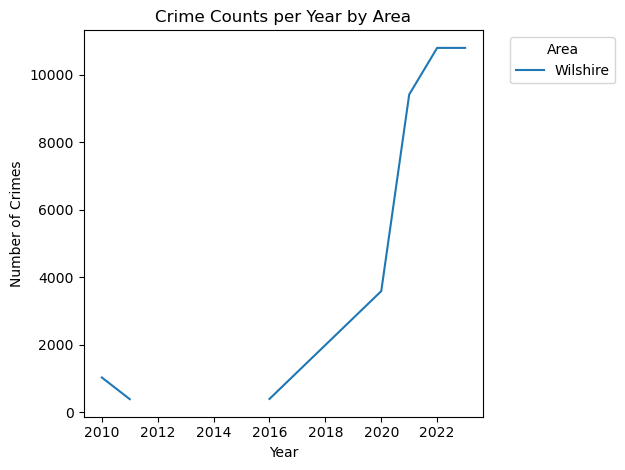

In [19]:
plt.figure(figsize=(12,8))
for area in area_year_crime_counts.index:
    plt.plot(area_year_crime_counts.columns, area_year_crime_counts.loc[area], label=area)
    
    plt.title('Crime Counts per Year by Area')
    plt.xlabel('Year')
    plt.ylabel('Number of Crimes')
    plt.legend(title='Area', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

<font size=5><b>What are the characteristics of crime victims age, and are there noticeable patterns or anomalies?</b></font>

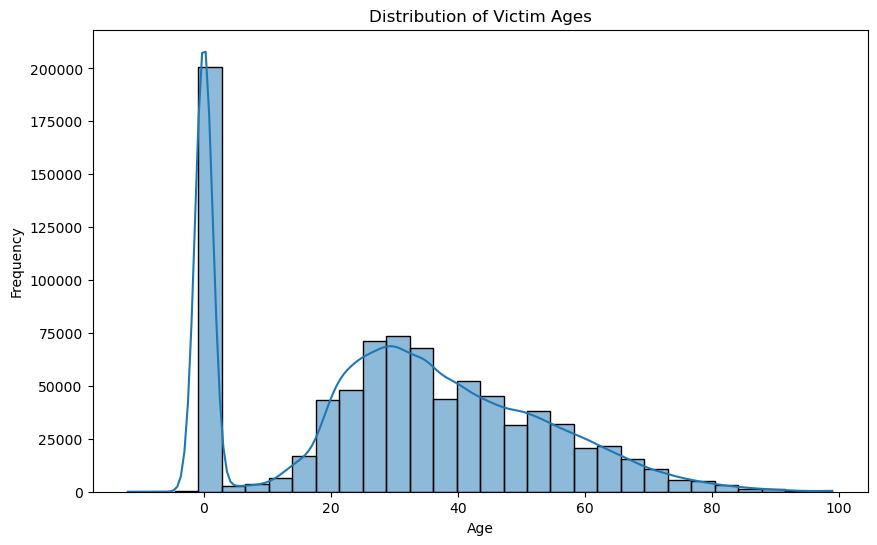

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(data['Vict Age'], bins=30, kde=True)
plt.title('Distribution of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [21]:
print(data['Vict Age'].value_counts().sort_index().head(10))

-12     1
-11     1
-10     6
-9      3
-8      3
-7     11
-6      5
-5      7
-4     10
-3     12
Name: Vict Age, dtype: int64


In [22]:
unusual_values = data['Vict Age'].isin([0, 99, -1]).sum()
print("Number of unusual age values: ", unusual_values)

Number of unusual age values:  200576


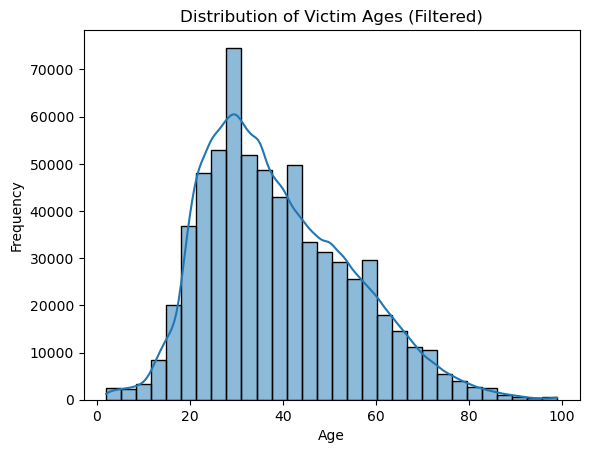

In [23]:
filtered_data = data[data['Vict Age'] > 0]
sns.histplot(filtered_data['Vict Age'], bins=30, kde= True)
plt.title('Distribution of Victim Ages (Filtered)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<font size=3><b>Answer:  The peak age of the victims of crime in LA is the age 30.</b></font>